# University Performance Predictor

Given a student's previous performance metrics, predict their performance at an anonymous University in Colombia.

## Prepare Data
Load and inspect two anonymized datasets:
- `icfes_combined_anonymized.csv`: standardized test scores (ICFES).
- `student_info_anonymized.csv`: student academic performance at the university.

For each student, we have their national test score for 'ICFES/SABER' (Colombian counterpart of the SAT), the high school they graduated (and their percentile in that highschool, being a relationship between their test score and their school historic performance on the test), their admission way to the University (high school grades / ICFES score / transfer from another University, etc), their undergraduate major, overall University GPA, overall hours taken, overall hours dropped, overall hours failed, and semesters coursed at the Colombian University. We have anonymized the student data and the school data for NDA purposes.

In [ ]:
# usage: from icfes_loader import load_icfes_dataset, load_icfes_subset
# load_icfes_dataset(path)
# load_icfes_subset(n, path)

import pandas as pd
from pathlib import Path

# Icfes csv data types
ICFES_DTYPES = {
    "SCHOOL_ID": "string",
    "PUNT_LECTURA_CRITICA": "float64",
    "PERCENTIL_LECTURA_CRITICA": "float64",
    "PUNT_MATEMATICAS": "float64",
    "PERCENTIL_MATEMATICAS": "float64",
    "PUNT_C_NATURALES": "float64",
    "PERCENTIL_C_NATURALES": "float64",
    "PUNT_SOCIALES_CIUDADANAS": "float64",
    "PERCENTIL_SOCIALES_CIUDADANAS": "float64",
    "PUNT_INGLES": "float64",
    "PERCENTIL_INGLES": "float64",
    "PUNT_GLOBAL": "float64",
    "PERCENTIL_GLOBAL": "float64",
    "semestre": "int64"
}

def load_icfes_dataset(path: str = "anonymized/icfes_combined_anonymized.csv") -> pd.DataFrame:
    """
    Load the full ICFES dataset with correct data types.
    Automatically handles non-numeric values gracefully.
    """
    path = Path(path)

    df = pd.read_csv(path, sep=';', low_memory=False)

    # Convert numeric columns
    for col, dtype in ICFES_DTYPES.items():
        if col not in df.columns:
            continue  # skip if column missing
        if dtype.startswith("float") or dtype.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce")
        elif dtype == "string":
            df[col] = df[col].astype("string")

    return df


def load_icfes_subset(n: int, path: str = "anonymized/icfes_combined_anonymized.csv") -> pd.DataFrame:
    """
    Load a subset (first n rows) of the ICFES dataset with correct data types.

    Args:
        n (int): Number of rows to load.
        path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Subset of dataset.
    """
    path = Path(path)

    df = pd.read_csv(path, sep=';', low_memory=False, nrows=n)

    for col, dtype in ICFES_DTYPES.items():
        if col not in df.columns:
            continue
        if dtype.startswith("float") or dtype.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce")
        elif dtype == "string":
            df[col] = df[col].astype("string")

    return df

# usage: from student_loader import load_student_dataset, load_student_subset
# load_student_dataset(path)
# load_student_subset(n, path)

import pandas as pd
from pathlib import Path

# Student CSV data types
STUDENT_DTYPES = {
    "STUDENT_ID": "string",
    "ADMISSION_TYPE": "string",
    "STUDY_PROGRAM": "string",
    "TEST_SCORE_NEEDED_MAJOR": "float64",
    "ENTRY_TERM": "int64",
    "TEST_SCORE": "float64",
    "TEST_SCORE_MATH": "float64",
    "TEST_SCORE_LECT": "float64",
    "TEST_SCORE_SOCIAL": "float64",
    "TEST_SCORE_SCIENCE": "float64",
    "TEST_SCORE_ENGLISH": "float64",
    "TERM_CODE": "int64",
    "TERM_GPA": "float64",
    "OVERALL_GPA": "float64",
    "HOURS_TAKEN": "float64",
    "HOURS_FINISHED": "float64",
    "HOURS_PASSED": "float64",
    "HOURS_FAILED": "float64",
    "HOURS_DROPPED": "float64",
    "SCHOOL_ID": "string",
}

def load_student_dataset(path: str = "anonymized/student_info_anonymized.csv") -> pd.DataFrame:
    """
    Load the full student performance dataset with correct data types.

    Args:
        path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: The dataset with proper column types.
    """
    path = Path(path)

    df = pd.read_csv(path, sep=';', low_memory=False)

    for col, dtype in STUDENT_DTYPES.items():
        if col not in df.columns:
            continue
        if dtype.startswith("float") or dtype.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce")
        elif dtype == "string":
            df[col] = df[col].astype("string")

    return df


def load_student_subset(n: int, path: str = "anonymized/student_info_anonymized.csv") -> pd.DataFrame:
    """
    Load a subset (first n rows) of the student dataset with correct data types.

    Args:
        n (int): Number of rows to load.
        path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Subset of dataset.
    """
    path = Path(path)

    df = pd.read_csv(path, sep=';', low_memory=False, nrows=n)

    for col, dtype in STUDENT_DTYPES.items():
        if col not in df.columns:
            continue
        if dtype.startswith("float") or dtype.startswith("int"):
            df[col] = pd.to_numeric(df[col], errors="coerce")
        elif dtype == "string":
            df[col] = df[col].astype("string")

    return df

If running locally, make sure the `anonymized/` folder is located at the project root (same directory as this notebook) and must contain:
- `icfes_combined_anonymized.csv`
- `student_info_anonymized.csv`

If using Google Colab, make sure the `anonymized/` folder is located under `content` folder and must contain:
- `icfes_combined_anonymized.csv`
- `student_info_anonymized.csv`

In [ ]:
# Load the full ICFES dataset
icfes_path = "anonymized/icfes_combined_anonymized.csv" # @param {type:"string"}
icfes_df = load_icfes_dataset(icfes_path) # input path to csv file
icfes_df

,SCHOOL_ID,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,semestre
0,school_id_100000,67.0,78.0,81.0,97.0,76.0,95.0,76.0,94.0,80.0,80.0,377.0,94.0,20171
1,school_id_100001,54.0,38.0,50.0,36.0,53.0,38.0,39.0,10.0,52.0,38.0,246.0,30.0,20171
2,school_id_100002,59.0,53.0,60.0,58.0,56.0,47.0,61.0,61.0,50.0,35.0,292.0,53.0,20171
3,school_id_100003,54.0,38.0,60.0,60.0,59.0,54.0,53.0,40.0,79.0,79.0,291.0,52.0,20171
4,school_id_100004,63.0,67.0,63.0,67.0,61.0,59.0,59.0,57.0,78.0,76.0,314.0,64.0,20171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704617,school_id_101125,44.0,20.0,38.0,15.0,38.0,13.0,47.0,47.0,38.0,13.0,207.0,20.0,20232
1704618,school_id_101125,54.0,54.0,48.0,38.0,56.0,71.0,48.0,51.0,56.0,70.0,259.0,55.0,20232
1704619,school_id_107940,57.0,62.0,61.0,78.0,54.0,66.0,60.0,81.0,52.0,58.0,288.0,73.0,20232
1704620,school_id_107940,70.0,95.0,73.0,96.0,74.0,100.0,70.0,97.0,64.0,85.0,356.0,98.0,20232


In [ ]:
# load student dataset
student_path = "anonymized/student_info_anonymized.csv" # @param {type:"string"}
student_df = load_student_dataset(student_path)
student_df

,STUDENT_ID,ADMISSION_TYPE,STUDY_PROGRAM,TEST_SCORE_NEEDED_MAJOR,ENTRY_TERM,TEST_SCORE,TEST_SCORE_MATH,TEST_SCORE_LECT,TEST_SCORE_SOCIAL,TEST_SCORE_SCIENCE,TEST_SCORE_ENGLISH,TERM_CODE,TERM_GPA,OVERALL_GPA,HOURS_TAKEN,HOURS_FINISHED,HOURS_PASSED,HOURS_FAILED,HOURS_DROPPED,SCHOOL_ID
0,student_id_200000000,entry_way_0,study_major_0,330,201620,385,84,72,73,72,97,201620,3.938000,3.928168,0,0,0,0,0,school_id_112464
1,student_id_200000000,entry_way_0,study_major_0,330,201620,385,84,72,73,72,97,201710,3.922500,3.928168,0,0,0,0,0,school_id_112464
2,student_id_200000000,entry_way_0,study_major_0,330,201620,385,84,72,73,72,97,201720,4.020000,3.928168,0,0,0,0,0,school_id_112464
3,student_id_200000000,entry_way_0,study_major_0,330,201620,385,84,72,73,72,97,201810,3.783333,3.928168,18,18,18,0,0,school_id_112464
4,student_id_200000000,entry_way_0,study_major_0,330,201620,385,84,72,73,72,97,201820,3.862000,3.928168,15,15,15,0,0,school_id_112464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232679,student_id_200030496,entry_way_0,study_major_6,300,202520,328,68,64,64,62,80,202520,0.000000,0.000000,13,11,7,4,2,school_id_112471
232680,student_id_200030497,entry_way_0,study_major_15,310,202520,343,67,74,67,67,66,202520,0.000000,0.000000,16,16,13,3,0,school_id_107493
232681,student_id_200030498,entry_way_0,study_major_4,310,202520,382,80,70,82,75,73,202520,0.000000,0.000000,17,17,17,0,0,school_id_102102
232682,student_id_200030499,entry_way_0,study_major_4,310,202520,367,73,71,73,75,78,202520,0.000000,0.000000,17,14,14,0,3,school_id_107899


### PRE-CLEANING VISUALIZATION

Saved: icfes_school_averages.csv
Saved: student_school_averages.csv
Merged shape: (2472, 30)
          SCHOOL_ID  PUNT_GLOBAL  OVERALL_GPA
0  school_id_100000   338.655367     3.987457
1  school_id_100001   301.422330     3.980827
2  school_id_100003   299.537815     4.302390
3  school_id_100004   336.031496     4.086214
4  school_id_100005   342.035294     4.080445


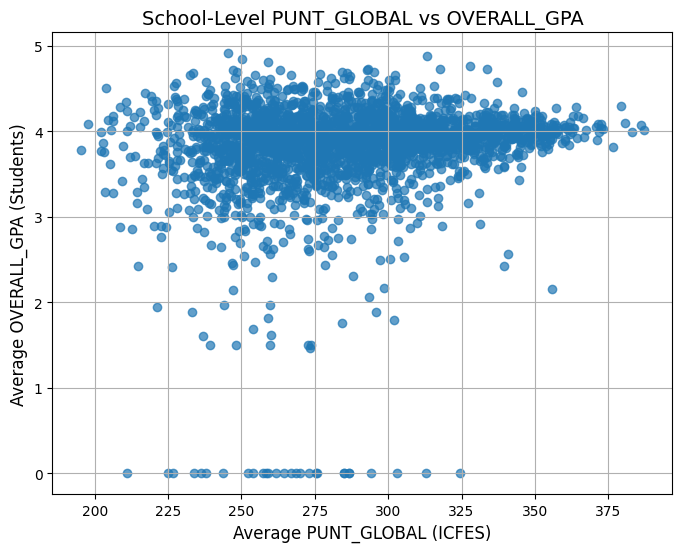

In [ ]:
# PRE-CLEANING VISUALIZATION - SANGWOO

# icfes: GROUP BY SCHOOL_ID

'''
def load_icfes_dataset(path="anonymized/icfes_combined_anonymized.csv") -> pd.DataFrame:
    df = pd.read_csv(path, sep=';', low_memory=False)

    # Converting ALL columns except SCHOOL_ID to numeric
    for col in df.columns:
        if col != "SCHOOL_ID":
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Converting SCHOOL_ID to string
    df["SCHOOL_ID"] = df["SCHOOL_ID"].astype("string")

    return df
'''
def aggregate_icfes_by_school(df: pd.DataFrame) -> pd.DataFrame:
    numeric_columns = df.select_dtypes(include=['number']).columns

    school_avg = (
        df.groupby("SCHOOL_ID")[numeric_columns]
          .mean()
          .reset_index()
    )

    return school_avg

df = load_icfes_dataset()
school_avg = aggregate_icfes_by_school(df)
school_avg.head()

# Exporting to CSV
output_path = "icfes_school_averages.csv"
school_avg.to_csv(output_path, index=False)

print("Saved:", output_path)


# student: GROUP BY STUDENT_ID
'''
def load_student_dataset(path="anonymized/student_info_anonymized.csv") -> pd.DataFrame:
    """
    Load the full student dataset and safely convert numeric columns.
    SCHOOL_ID is in column 15 of the CSV file.
    """
    df = pd.read_csv(path, sep=';', low_memory=False)

    # Converting SCHOOL_ID to string
    df["SCHOOL_ID"] = df["SCHOOL_ID"].astype("string")

    # Converting all other columns to numeric where possible
    for col in df.columns:
        if col != "SCHOOL_ID":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    return df
'''

# Previous groupby function
def aggregate_student_by_school(df: pd.DataFrame) -> pd.DataFrame:
    """
    Averageing all numeric columns per SCHOOL_ID.
    Output:
      - One row per SCHOOL_ID
      - One averaged value per numeric column
    """
    # Selecting numeric columns (skiping SCHOOL_ID)
    numeric_cols = df.select_dtypes(include=["number"]).columns

    school_avg = (
        df.groupby("SCHOOL_ID")[numeric_cols]
          .mean()
          .reset_index()
    )

    return school_avg


# Loading student dataset
df_students = load_student_dataset("anonymized/student_info_anonymized.csv")

# Aggregating by SCHOOL_ID
student_school_avg = aggregate_student_by_school(df_students)

# Exporting to CSV
output_path = "student_school_averages.csv"
student_school_avg.to_csv(output_path, index=False)

print("Saved:", output_path)

# Scatterplots / Box plots

# For each SCHOOL_ID
#  Ploting PUNT_GLOBAL vs. OVERALL_GPA
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Load averaged CSV files
# --------------------------
icfes = pd.read_csv("icfes_school_averages.csv")
students = pd.read_csv("student_school_averages.csv")

# Converting SCHOOL_ID to string to ensure clean merge
icfes["SCHOOL_ID"] = icfes["SCHOOL_ID"].astype(str)
students["SCHOOL_ID"] = students["SCHOOL_ID"].astype(str)

# --------------------------
# Merge by SCHOOL_ID
# --------------------------
merged = pd.merge(icfes, students, on="SCHOOL_ID", how="inner")

print("Merged shape:", merged.shape)
print(merged[["SCHOOL_ID", "PUNT_GLOBAL", "OVERALL_GPA"]].head())

# --------------------------
# Scatter Plot
# --------------------------
plt.figure(figsize=(8,6))
plt.scatter(
    merged["PUNT_GLOBAL"],
    merged["OVERALL_GPA"],
    alpha=0.7
)

plt.xlabel("Average PUNT_GLOBAL (ICFES)", fontsize=12)
plt.ylabel("Average OVERALL_GPA (Students)", fontsize=12)
plt.title("School-Level PUNT_GLOBAL vs OVERALL_GPA", fontsize=14)

plt.grid(True)
plt.show()


### PRE-CLEANING STATISTICS

In [ ]:
# PRE-CLEANING STATISTICS - RICHARD
pd.set_option("display.max_columns", None) # show all columns

print("PRE-CLEANING STATISTICS")

# 1. ICFES STATISTICS (mean, median, std, min, max) BY SCHOOL
# This includes all the numerical data from raw ICFES which helps us in determining how to clean the data
print("ICFES SCORE STATISTICS BY SCHOOL_ID\n")
# takes the raw ICFES dataset icfes_df, picks only numeric columns (test scores, percentiles, semester, etc.)
numeric_icfes = icfes_df.select_dtypes(include="number").columns

icfes_stats_by_school = (
    icfes_df.groupby("SCHOOL_ID")[numeric_icfes] # Groups all ICFES records by the school they belong to, limit the aggregation to numeric columns only
            .agg(["mean", "median", "std", "min", "max"]) # for each school and each numeric column, compute the statistics
)
display(icfes_stats_by_school) # a table indexed by SCHOOL_ID, containing statistics of each feature (Percentile, scores, etc)


# 2. STUDENT UNIVERSITY PERFORMANCE STATISTICS BY SCHOOL
# This inlcudes all the numerical data from raw student dataset, looking at the TERM_GPA, OVERALL_GPA for each school can be helpful
print("\nSTUDENT PERFORMANCE STATISTICS BY SCHOOL_ID\n")
# takes the raw student dataset student_df, picks only numeric columns
numeric_student = student_df.select_dtypes(include="number").columns

stud_stats_by_school = (
    student_df.groupby("SCHOOL_ID")[numeric_student] # group by school,
              .agg(["mean", "median", "std", "min", "max"])
)
display(stud_stats_by_school) # a table indexed by SCHOOL_ID, containing statistics of each feature


# 3. STUDENT PERFORMANCE STATISTICS BY MAJOR
# This uses only the student dataset which contains the STUDY_PROGRAM column (study major)
print("\nUNIVERSITY GPA STATISTICS BY STUDY_PROGRAM (Major). Sorted in Descending Mean OVERALL_GPA\n")

if "STUDY_PROGRAM" in student_df.columns: # check that the column STUDY_PROGRAM exists
    gpa_stats_by_major = (
        student_df.groupby("STUDY_PROGRAM")["OVERALL_GPA"] # group students by STUDY_PROGRAM (major) and focus on OVERALL_GPA column
                  .agg(["mean", "median", "std", "min", "max"])
                  .sort_values("mean", ascending=False) # sorted in descending mean OVERALL_GPA
    )
    display(gpa_stats_by_major)
else:
    print("STUDY_PROGRAM column not found.")


# 4. OVERALL NUMERICAL STATISTICS
# This uses the numerical data from both icfes datasetand student dataset
print("Number of unique SCHOOL_ID in ICFES dataset:", icfes_df["SCHOOL_ID"].nunique())
print("Number of unique SCHOOL_ID in Student dataset:", student_df["SCHOOL_ID"].nunique())

icfes_ids = set(icfes_df["SCHOOL_ID"].unique())
student_ids = set(student_df["SCHOOL_ID"].unique())

print("\nSCHOOL_IDs present only in ICFES dataset:", len(icfes_ids - student_ids))
print("SCHOOL_IDs present only in Student dataset:", len(student_ids - icfes_ids))
print("SCHOOL_IDs present in BOTH:", len(icfes_ids & student_ids))


print("\nCOMBINED (ICFES + Student) STATISTICS BY SCHOOL_ID\n")
# Merge the two aggregated tables on SCHOOL_ID. SCHOOL_ID (and SCHOOL_NAME) is the only shared atttribue, other columns are all unique
combined_stats_by_school = icfes_stats_by_school.join(
    stud_stats_by_school,
    how="inner",
)
display(combined_stats_by_school)


PRE-CLEANING STATISTICS
ICFES SCORE STATISTICS BY SCHOOL_ID



PUNT_LECTURA_CRITICA                                \
                                 mean median       std   min    max   
SCHOOL_ID                                                             
school_id_100000            67.983051   68.0  7.642937  39.0  100.0   
school_id_100001            61.635922   62.0  7.935009  33.0   80.0   
school_id_100002            59.983740   60.0  8.300390  32.0   82.0   
school_id_100003            60.235294   61.0  8.556597  32.0   77.0   
school_id_100004            66.889764   67.0  6.845492  50.0   82.0   
...                               ...    ...       ...   ...    ...   
school_id_112459            37.000000   37.0       NaN  37.0   37.0   
school_id_112460            42.000000   42.0       NaN  42.0   42.0   
school_id_112461            54.000000   54.0       NaN  54.0   54.0   
school_id_112462            44.666667   45.0  1.527525  43.0   46.0   
school_id_112463            58.000000   58.0       NaN  58.0   58.0   

                 PERCENTIL_LECTURA_CRITICA                                 \
                                      mean median        std   min    max   
SCHOOL_ID                                                                   
school_id_100000                 72.627119   77.0  20.616546   8.0  100.0   
school_id_100001                 56.694175   55.0  22.238588   2.0  100.0   
school_id_100002                 52.013550   51.0  22.872100   2.0  100.0   
school_id_100003                 53.327731   53.0  22.842908   1.0   98.0   
school_id_100004                 70.795276   72.0  19.273033  17.0  100.0   
...                                    ...    ...        ...   ...    ...   
school_id_112459                  6.000000    6.0        NaN   6.0    6.0   
school_id_112460                 14.000000   14.0        NaN  14.0   14.0   
school_id_112461                 53.000000   53.0        NaN  53.0   53.0   
school_id_112462                 22.666667   24.0   4.163332  18.0   26.0   
school_id_112463                 67.000000   67.0        NaN  67.0   67.0   

                 PUNT_MATEMATICAS                                 \
                             mean median        std   min    max   
SCHOOL_ID                                                          
school_id_100000        67.327684   68.0   8.054853  32.0  100.0   
school_id_100001        61.160194   61.0   9.780946  30.0  100.0   
school_id_100002        58.991870   59.0   9.632793  27.0   83.0   
school_id_100003        59.210084   61.0  10.082603  17.0   81.0   
school_id_100004        67.196850   67.0   8.219257  46.0   84.0   
...                           ...    ...        ...   ...    ...   
school_id_112459        44.000000   44.0        NaN  44.0   44.0   
school_id_112460        36.000000   36.0        NaN  36.0   36.0   
school_id_112461        61.000000   61.0        NaN  61.0   61.0   
school_id_112462        40.000000   40.0   2.000000  38.0   42.0   
school_id_112463        64.000000   64.0        NaN  64.0   64.0   

                 PERCENTIL_MATEMATICAS                                 \
                                  mean median        std   min    max   
SCHOOL_ID                                                               
school_id_100000             70.406780   73.0  18.719325   5.0  100.0   
school_id_100001             57.592233   57.0  21.542216   4.0  100.0   
school_id_100002             52.959350   53.0  22.266444   2.0   99.0   
school_id_100003             54.168067   57.0  21.849376   1.0   98.0   
school_id_100004             71.110236   74.0  18.822154  16.0  100.0   
...                                ...    ...        ...   ...    ...   
school_id_112459             28.000000   28.0        NaN  28.0   28.0   
school_id_112460             11.000000   11.0        NaN  11.0   11.0   
school_id_112461             78.000000   78.0        NaN  78.0   78.0   
school_id_112462             18.333333   19.0   4.041452  14.0   22.0   
school_id_112463             84.000000   


STUDENT PERFORMANCE STATISTICS BY SCHOOL_ID



TEST_SCORE_NEEDED_MAJOR                              \
                                    mean median        std  min  max   
SCHOOL_ID                                                              
school_id_100000              325.683084  315.0  24.124992  300  375   
school_id_100001              335.000000  335.0   0.000000  335  335   
school_id_100003              328.787879  310.0  23.816693  300  360   
school_id_100004              329.784615  325.0  22.810608  300  375   
school_id_100005              326.264811  315.0  24.369585  300  385   
...                                  ...    ...        ...  ...  ...   
school_id_112586              310.000000  310.0   0.000000  310  310   
school_id_112587              300.000000  300.0        NaN  300  300   
school_id_112588              300.000000  300.0        NaN  300  300   
school_id_112589              310.000000  310.0        NaN  310  310   
school_id_112590              310.000000  310.0        NaN  310  310   

                     ENTRY_TERM                                        \
                           mean    median         std     min     max   
SCHOOL_ID                                                               
school_id_100000  201956.788009  202010.0  273.010486  201520  202520   
school_id_100001  201720.000000  201720.0    0.000000  201720  201720   
school_id_100003  201979.090909  202010.0  313.960225  201620  202420   
school_id_100004  201911.292308  201920.0  236.268949  201610  202520   
school_id_100005  201939.776798  201920.0  265.699405  201520  202520   
...                         ...       ...         ...     ...     ...   
school_id_112586  202520.000000  202520.0    0.000000  202520  202520   
school_id_112587  202520.000000  202520.0         NaN  202520  202520   
school_id_112588  202520.000000  202520.0         NaN  202520  202520   
school_id_112589  202520.000000  202520.0         NaN  202520  202520   
school_id_112590  202520.000000  202520.0         NaN  202520  202520   

                  TEST_SCORE                             TEST_SCORE_MATH  \
                        mean median        std  min  max            mean   
SCHOOL_ID                                                                  
school_id_100000  363.584582  364.0  30.314850  289  423       74.040685   
school_id_100001  376.000000  376.0   0.000000  376  376       82.000000   
school_id_100003  367.606061  355.0  47.418970  308  421       73.030303   
school_id_100004  363.840000  366.0  27.949120  296  410       75.341538   
school_id_100005  354.831634  354.0  32.272271  218  499       72.771562   
...                      ...    ...        ...  ...  ...             ...   
school_id_112586  406.500000  406.5  26.162951  388  425      100.000000   
school_id_112587  330.000000  330.0        NaN  330  330       70.000000   
school_id_112588  313.000000  313.0        NaN  313  313       58.000000   
school_id_112589  334.000000  334.0        NaN  334  334       68.000000   
school_id_112590  337.000000  337.0        NaN  337  337       65.000000   

                                             TEST_SCORE_LECT                   \
                 median        std  min  max            mean median       std   
SCHOOL_ID                                                                       
school_id_100000   73.0   9.557397   56  100       70.160600   70.0  6.549736   
school_id_100001   82.0   0.000000   82   82       77.000000   77.0  0.000000   
school_id_100003   70.0  11.809649   60   87       70.212121   73.0  9.030357   
school_id_100004   76.0   9.035098   52  100       70.858462   71.0  5.640870   
school_id_100005   72.0  10.532954   10  100       68.232847   68.0  7.492816   
...                 ...        ...  ...  ...             ...    ...       ...   
school_id_112586  100.0   0.000000  100  100       73.000000   73.0  5.656854   
school_id_112587   70.0        NaN   70   70       61.000000   61.0       NaN   
school_id_112588   58.0      


UNIVERSITY GPA STATISTICS BY STUDY_PROGRAM (Major). Sorted in Descending Mean OVERALL_GPA



,mean,median,std,min,max
STUDY_PROGRAM,,,,,
study_major_43,4.472366,4.472366,0.000000,4.472366,4.472366
study_major_24,4.305321,4.341525,0.415256,0.000000,4.882000
study_major_46,4.277287,4.361842,0.634709,0.000000,4.823000
study_major_28,4.241298,4.301458,0.399079,0.000000,4.910843
study_major_31,4.217900,4.272308,0.413321,0.000000,4.833289
study_major_25,4.211175,4.317559,0.520692,0.000000,4.822478
study_major_3,4.199819,4.249477,0.451593,0.000000,4.896250
study_major_33,4.197592,4.183592,0.324763,3.367500,4.749296
study_major_27,4.165786,4.237687,0.533478,0.000000,4.865234


Number of unique SCHOOL_ID in ICFES dataset: 12464
Number of unique SCHOOL_ID in Student dataset: 2599

SCHOOL_IDs present only in ICFES dataset: 9992
SCHOOL_IDs present only in Student dataset: 127
SCHOOL_IDs present in BOTH: 2472

COMBINED (ICFES + Student) STATISTICS BY SCHOOL_ID



PUNT_LECTURA_CRITICA                                 \
                                 mean median        std   min    max   
SCHOOL_ID                                                              
school_id_100000            67.983051   68.0   7.642937  39.0  100.0   
school_id_100001            61.635922   62.0   7.935009  33.0   80.0   
school_id_100003            60.235294   61.0   8.556597  32.0   77.0   
school_id_100004            66.889764   67.0   6.845492  50.0   82.0   
school_id_100005            67.819118   68.0   6.990500  31.0  100.0   
...                               ...    ...        ...   ...    ...   
school_id_112190            62.352941   63.0   9.212364  45.0   78.0   
school_id_112209            54.086957   54.0   9.029814  35.0   69.0   
school_id_112230            55.925000   56.0  10.749806  33.0   76.0   
school_id_112355            68.142857   70.0   7.057586  56.0   76.0   
school_id_112384            66.809524   68.0   5.844819  54.0   75.0   

                 PERCENTIL_LECTURA_CRITICA                                 \
                                      mean median        std   min    max   
SCHOOL_ID                                                                   
school_id_100000                 72.627119   77.0  20.616546   8.0  100.0   
school_id_100001                 56.694175   55.0  22.238588   2.0  100.0   
school_id_100003                 53.327731   53.0  22.842908   1.0   98.0   
school_id_100004                 70.795276   72.0  19.273033  17.0  100.0   
school_id_100005                 73.435294   76.0  19.216584   1.0  100.0   
...                                    ...    ...        ...   ...    ...   
school_id_112190                 74.117647   80.0  22.789478  24.0  100.0   
school_id_112209                 52.391304   53.0  27.252588   4.0   94.0   
school_id_112230                 57.025000   60.0  29.878804   2.0   99.0   
school_id_112355                 88.571429   95.0  13.648652  61.0   99.0   
school_id_112384                 87.047619   92.0  12.936291  53.0   99.0   

                 PUNT_MATEMATICAS                                 \
                             mean median        std   min    max   
SCHOOL_ID                                                          
school_id_100000        67.327684   68.0   8.054853  32.0  100.0   
school_id_100001        61.160194   61.0   9.780946  30.0  100.0   
school_id_100003        59.210084   61.0  10.082603  17.0   81.0   
school_id_100004        67.196850   67.0   8.219257  46.0   84.0   
school_id_100005        68.917647   69.0   8.135758  37.0  100.0   
...                           ...    ...        ...   ...    ...   
school_id_112190        59.176471   61.0  12.187264  33.0   79.0   
school_id_112209        55.739130   55.0   9.121490  41.0   75.0   
school_id_112230        55.250000   56.0  14.316478  25.0  100.0   
school_id_112355        69.142857   68.0   8.877473  57.0   84.0   
school_id_112384        71.333333   71.0   6.559980  59.0   82.0   

                 PERCENTIL_MATEMATICAS                                 \
                                  mean median        std   min    max   
SCHOOL_ID                                                               
school_id_100000             70.406780   73.0  18.719325   5.0  100.0   
school_id_100001             57.592233   57.0  21.542216   4.0  100.0   
school_id_100003             54.168067   57.0  21.849376   1.0   98.0   
school_id_100004             71.110236   74.0  18.822154  16.0  100.0   
school_id_100005             74.505882   77.0  16.405752   5.0  100.0   
...                                ...    ...        ...   ...    ...   
school_id_112190             67.705882   77.0  27.662621   8.0   99.0   
school_id_112209             60.347826   62.0  23.135193  20.0   98.0   
school_id_112230             58.625000   64.5  29.768067   1.0  100.0   
school_id_112355             88.714286   92.0  11.455920  68.0  100.0   
school_id_112384           

### Data Cleaning/Preprocess

In [ ]:
# DATA CLEANING - JET
# define the cleaning functions

import numpy as np

def clean_numeric_columns(df: pd.DataFrame) -> pd.DataFrame:
    """
    Converts all non-ID columns to numeric.
    ID columns remain strings.
    """
    for col in df.columns:
        if "ID" not in col and "ADMISSION_TYPE" not in col and "STUDY_PROGRAM" not in col:
            df[col] = pd.to_numeric(df[col], errors="coerce")
        else:
            df[col] = df[col].astype("string")
    return df


def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    before = len(df)
    df = df.drop_duplicates()
    after = len(df)
    print(f"Removed {before - after} duplicate rows.")
    return df


'''
def fix_missing_values(df: pd.DataFrame, strategy="median") -> pd.DataFrame:
    """
    Handles missing values in a simple and consistent way.
    strategy = 'median' or 'mean'
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns

    for col in numeric_cols:
        if strategy == "median":
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mean())

    return df
'''
def remove_nan(df: pd.DataFrame) -> pd.DataFrame:
    """
    Drop rows that have missing values in any numeric column.
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns

    # Drop rows where ANY of the numeric columns is NaN
    before = len(df)

    df_clean = df.dropna(subset=numeric_cols)
    after = len(df_clean)
    dropped = before - after
    print(f"Dropped {dropped} rows with nan values.")

    return df_clean


def remove_outliers(df: pd.DataFrame, z_thresh=4):
    """
    Removes outliers using z-score thresholding.
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns
    before = len(df)
    for col in numeric_cols:
        df = df[(np.abs((df[col] - df[col].mean()) / df[col].std()) < z_thresh) | df[col].isna()]
    after = len(df)

    print(f"Removed {before - after} outliers.")
    return df

def load_clean_icfes(path="anonymized/icfes_combined_anonymized.csv") -> pd.DataFrame:
    df = load_icfes_dataset(path)

    #df = remove_duplicates(df)
    #df = clean_numeric_columns(df)
    #df = fix_missing_values(df)
    df = remove_nan(df)
    #df = remove_outliers(df)

    print("ICFES dataset cleaned.")
    return df

def load_clean_student(path="anonymized/student_info_anonymized.csv") -> pd.DataFrame:
    df = load_student_dataset(path)

    #df = remove_duplicates(df)
    #df = clean_numeric_columns(df)
    #df = fix_missing_values(df)
    df = remove_nan(df)
    #df = remove_outliers(df)

    print("Student dataset cleaned.")
    return df

def clean_secondary_csv(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)

    df = remove_duplicates(df)
    #df = clean_numeric_columns(df)
    #df = fix_missing_values(df)
    df = remove_nan(df)
    #df = remove_outliers(df)

    print(f"Secondary file cleaned: {path}")
    return df


In [ ]:
# Execute Primary CSV Cleaning Workflow

icfes_df = load_clean_icfes("anonymized/icfes_combined_anonymized.csv")
students_df = load_clean_student("anonymized/student_info_anonymized.csv")
# Secondary CSV Cleaning
icfes_school_avg = aggregate_icfes_by_school(icfes_df)
student_school_avg = aggregate_student_by_school(students_df)
print(icfes_school_avg)
icfes_school_avg.to_csv("icfes_school_averages.csv", index=False)
student_school_avg.to_csv("student_school_averages.csv", index=False)

print("Generated secondary CSVs.")

icfes_school_avg_cleaned = clean_secondary_csv("icfes_school_averages.csv")
student_school_avg_cleaned = clean_secondary_csv("student_school_averages.csv")

# Overwrite
icfes_school_avg_cleaned.to_csv("icfes_school_averages_cleaned.csv", index=False)
student_school_avg_cleaned.to_csv("student_school_averages_cleaned.csv", index=False)

print("Saved cleaned secondary CSVs.")


Dropped 8418 rows with nan values.
ICFES dataset cleaned.
Dropped 0 rows with nan values.
Student dataset cleaned.
              SCHOOL_ID  PUNT_LECTURA_CRITICA  PERCENTIL_LECTURA_CRITICA  \
0      school_id_100000             67.983051                  72.627119   
1      school_id_100001             61.635922                  56.694175   
2      school_id_100002             59.983740                  52.013550   
3      school_id_100003             60.235294                  53.327731   
4      school_id_100004             66.889764                  70.795276   
...                 ...                   ...                        ...   
12434  school_id_112459             37.000000                   6.000000   
12435  school_id_112460             42.000000                  14.000000   
12436  school_id_112461             54.000000                  53.000000   
12437  school_id_112462             44.666667                  22.666667   
12438  school_id_112463             58.000000    

### Post-cleaning Visualization

             SCHOOL_ID  PUNT_LECTURA_CRITICA  PERCENTIL_LECTURA_CRITICA  \
0     school_id_100000             67.983051                  72.627119   
1     school_id_100001             61.635922                  56.694175   
2     school_id_100003             60.235294                  53.327731   
3     school_id_100004             66.889764                  70.795276   
4     school_id_100005             67.819118                  73.435294   
...                ...                   ...                        ...   
2467  school_id_112190             62.352941                  74.117647   
2468  school_id_112209             54.086957                  52.391304   
2469  school_id_112230             55.925000                  57.025000   
2470  school_id_112355             68.142857                  88.571429   
2471  school_id_112384             66.809524                  87.047619   

      PUNT_MATEMATICAS  PERCENTIL_MATEMATICAS  PUNT_C_NATURALES  \
0            67.327684          

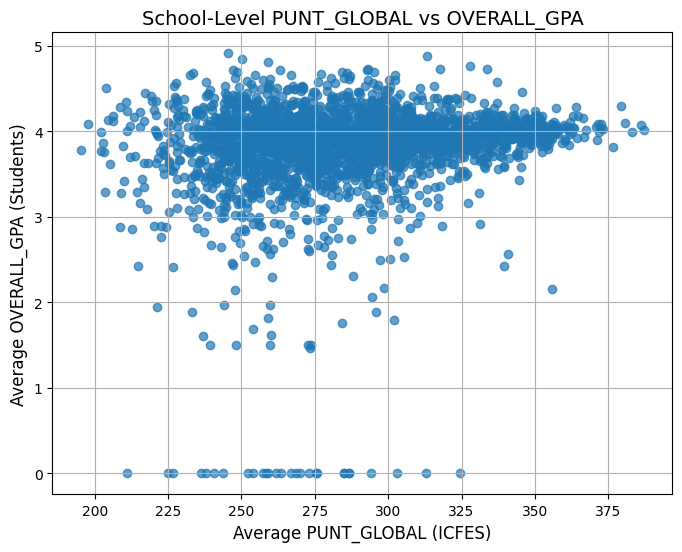

In [ ]:
# Print new plots after data cleaning

# For each SCHOOL_ID
#  Ploting PUNT_GLOBAL vs. OVERALL_GPA
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Load averaged CSV files
# --------------------------
icfes = pd.read_csv("icfes_school_averages_cleaned.csv")
students = pd.read_csv("student_school_averages_cleaned.csv")
#students = pd.read_csv("students_for_model_cleaned.csv")


# Converting SCHOOL_ID to string to ensure clean merge
icfes["SCHOOL_ID"] = icfes["SCHOOL_ID"].astype(str)
students["SCHOOL_ID"] = students["SCHOOL_ID"].astype(str)

# --------------------------
# Merge by SCHOOL_ID
# --------------------------
merged = pd.merge(icfes, students, on="SCHOOL_ID", how="inner")
print(merged)
print("Merged shape:", merged.shape)
print(merged[["SCHOOL_ID", "PUNT_GLOBAL", "OVERALL_GPA"]].head())

# --------------------------
# Scatter Plot
# --------------------------
plt.figure(figsize=(8,6))
plt.scatter(
    merged["PUNT_GLOBAL"],
    merged["OVERALL_GPA"],
    alpha=0.7
)

plt.xlabel("Average PUNT_GLOBAL (ICFES)", fontsize=12)
plt.ylabel("Average OVERALL_GPA (Students)", fontsize=12)
plt.title("School-Level PUNT_GLOBAL vs OVERALL_GPA", fontsize=14)

plt.grid(True)
plt.show()

### Model-specific Filtering and Aggregation
Applies model-specific filters and aggregates per student.
- student filters
- semester filters

In [ ]:
import pandas as pd

# Aditional filtering functions specific to our model - Nicolas
def filter_students_with_valid_school(
    students_df: pd.DataFrame,
    schools_df: pd.DataFrame,
    school_id_col: str = "SCHOOL_ID",) -> pd.DataFrame:
    """
    Keep only students whose school_id exists in the schools dataset.
    """
    valid_school_ids = schools_df[school_id_col].dropna().unique()
    before = len(students_df)
    students_df = students_df[students_df[school_id_col].isin(valid_school_ids)]
    after = len(students_df)

    print(f"Removed {before - after} students with non-matching schools.")
    return students_df

def filter_students_by_gpa(
    students_df: pd.DataFrame,
    gpa_col: str = "OVERALL_GPA",
    min_gpa: float = 1.5,) -> pd.DataFrame:
    """
    Keep only students with overall_GPA >= min_gpa.
    """
    before = len(students_df)
    students_df = students_df[students_df[gpa_col] >= min_gpa]
    after = len(students_df)

    print(f"Removed {before - after} students with GPA < {min_gpa}.")
    return students_df


def filter_students_by_icfes(
    students_df: pd.DataFrame,
    test_score_col: str = "TEST_SCORE") -> pd.DataFrame:
    """
    Keep only students with overall_GPA >= min_gpa.
    """
    before = len(students_df)
    students_df = students_df[(students_df[test_score_col] != 499) &
                              (students_df[test_score_col] != 100)]
    after = len(students_df)

    print(f"Removed {before - after} students with test score == 499 or 100.")
    return students_df



def aggregate_student_by_id(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aggregates student-level data per STUDENT_ID.

    Per STUDENT_ID:
      - Averages: TEST_SCORE_NEEDED_MAJOR, TEST_SCORE, TERM_GPA, OVERALL_GPA
      - Max: TERM_CODE (represents the last semester taken)
      - Sums: HOURS_TAKEN, HOURS_FINISHED, HOURS_PASSED, HOURS_FAILED, HOURS_DROPPED
      - First: ADMISSION_TYPE, STUDY_PROGRAM, ENTRY_TERM, SCHOOL_ID
      - Adds: N_SEMESTERS = number of distinct TERM_CODE values
    """

    required_cols = [
        "STUDENT_ID",
        "ADMISSION_TYPE",
        "STUDY_PROGRAM",
        "TEST_SCORE_NEEDED_MAJOR",
        "ENTRY_TERM",
        "TEST_SCORE",
        "TEST_SCORE_MATH",
        "TEST_SCORE_LECT",
        "TEST_SCORE_SOCIAL",
        "TEST_SCORE_SCIENCE",
        "TEST_SCORE_ENGLISH",
        "TERM_CODE",
        "TERM_GPA",
        "OVERALL_GPA",
        "HOURS_TAKEN",
        "HOURS_FINISHED",
        "HOURS_PASSED",
        "HOURS_FAILED",
        "HOURS_DROPPED",
        "SCHOOL_ID",
    ]

    group = df.groupby("STUDENT_ID")

    agg_dict = {
        # First (categorical)
        "ADMISSION_TYPE": "first",
        "STUDY_PROGRAM": "first",
        "ENTRY_TERM": "first",
        "SCHOOL_ID": "first",

        # Averages
        "TEST_SCORE_NEEDED_MAJOR": "mean",
        "TEST_SCORE": "mean",
        "TEST_SCORE_MATH": "mean",
        "TEST_SCORE_LECT": "mean",
        "TEST_SCORE_SOCIAL": "mean",
        "TEST_SCORE_SCIENCE": "mean",
        "TEST_SCORE_ENGLISH": "mean",
        "TERM_GPA": "mean", # Its the same as overall doing this, thats why we dont use it later on in the model.
        "OVERALL_GPA": "mean",

        # Last semester
        "TERM_CODE": "max",

        # Sums of hours
        "HOURS_TAKEN": "sum",
        "HOURS_FINISHED": "sum",
        "HOURS_PASSED": "sum",
        "HOURS_FAILED": "sum",
        "HOURS_DROPPED": "sum",
    }

    students_agg = group.agg(agg_dict)

    # Number of distinct semesters taken
    students_agg["N_SEMESTERS"] = group["TERM_CODE"].nunique()

    # Bring STUDENT_ID back as a column
    students_agg = students_agg.reset_index()

    return students_agg

def filter_students_by_number_of_semesters(
    students_df: pd.DataFrame,
    semester_col: str = "N_SEMESTERS",
    min_semesters: int = 4,) -> pd.DataFrame:
    """
    Keep only students with N_SEMESTERS >= 4
    """
    before = len(students_df)
    students_df = students_df[students_df[semester_col] >= min_semesters]
    after = len(students_df)

    print(f"Removed {before - after} students with number of semesters < {min_semesters}.")
    return students_df


# Keep only students whose SCHOOL_ID exists in icfes_df
students_df = filter_students_with_valid_school(
    students_df,
    icfes_df,
    school_id_col="SCHOOL_ID"
)
# Filter OVERALL_GPA >= 1.5
students_df = filter_students_by_gpa(
    students_df,
    gpa_col="OVERALL_GPA",
    min_gpa=1.5
)

students_df = filter_students_by_icfes(students_df)

# group by student id
aggregate_students_df = aggregate_student_by_id(students_df)

# Keep students with n semesters >= 4 so they can be a better proxy for performance
aggregate_students_filtered_df = filter_students_by_number_of_semesters(
    aggregate_students_df, semester_col="N_SEMESTERS", min_semesters=4)
print(aggregate_students_filtered_df)
print(icfes_df)

Removed 3399 students with non-matching schools.
Removed 1931 students with GPA < 1.5.
Removed 523 students with test score == 499 or 100.
Removed 5022 students with number of semesters < 4.
                 STUDENT_ID ADMISSION_TYPE   STUDY_PROGRAM  ENTRY_TERM  \
0      student_id_200000001    entry_way_0   study_major_1      201710   
1      student_id_200000002    entry_way_0   study_major_2      202020   
2      student_id_200000003    entry_way_0   study_major_3      201610   
3      student_id_200000006    entry_way_0   study_major_4      201610   
4      student_id_200000007    entry_way_0   study_major_1      201720   
...                     ...            ...             ...         ...   
26885  student_id_200027489    entry_way_2   study_major_4      202420   
26931  student_id_200027539    entry_way_0  study_major_27      202420   
26945  student_id_200027554    entry_way_2  study_major_22      202420   
26984  student_id_200027598    entry_way_0  study_major_10      20242

In [ ]:
# We add columns that relate icfes data set with students data set to create our final data set for our model
# 5) Build school-level stats from ICFES (icfes_df)

# Columns with exam scores, and percentiles in icfes_df
icfes_score_cols = [
    "PUNT_GLOBAL",
    "PERCENTIL_GLOBAL",
    "PUNT_MATEMATICAS",
    "PERCENTIL_MATEMATICAS",
    "PUNT_LECTURA_CRITICA",
    "PERCENTIL_LECTURA_CRITICA",
    "PUNT_C_NATURALES",
    "PERCENTIL_C_NATURALES",
    "PUNT_SOCIALES_CIUDADANAS",
    "PERCENTIL_SOCIALES_CIUDADANAS",
    "PUNT_INGLES",
    "PERCENTIL_INGLES",
]

# Group by SCHOOL_ID and compute aggregates
"""
# TODO: delete if everything works commented
# Ensure exam score columns are numeric (if not already)
for col in icfes_score_cols:
    icfes_df[col] = pd.to_numeric(icfes_df[col], errors="coerce")
"""
school_stats_df = (
    icfes_df
    .groupby("SCHOOL_ID")
    .agg({
        "PUNT_GLOBAL": ["mean", "std", "count"],
        "PERCENTIL_GLOBAL": ["mean", "std"],
        "PUNT_MATEMATICAS": ["mean", "std"],
        "PUNT_LECTURA_CRITICA": ["mean", "std"],
        "PUNT_C_NATURALES": ["mean", "std"],
        "PUNT_SOCIALES_CIUDADANAS": ["mean", "std"],
        "PUNT_INGLES": ["mean", "std"],
    })
)

# Flatten MultiIndex column names → e.g. PUNT_GLOBAL_mean
school_stats_df.columns = [
    f"{c[0]}_{c[1]}" for c in school_stats_df.columns.to_flat_index()
]

school_stats_df = school_stats_df.reset_index()

# Translate columns to english (lol)
school_stats_df.rename(columns={
    "PUNT_GLOBAL_mean": "school_mean_global",
    "PUNT_GLOBAL_std": "school_std_global",
    "PUNT_GLOBAL_count": "school_num_icfes_students",
    "PERCENTIL_GLOBAL_mean": "school_mean_percentile",
    "PERCENTIL_GLOBAL_std": "school_std_percentile",
    "PUNT_MATEMATICAS_mean": "school_mean_math",
    "PUNT_MATEMATICAS_std": "school_std_math",
    "PUNT_LECTURA_CRITICA_mean": "school_mean_read",
    "PUNT_LECTURA_CRITICA_std": "school_std_read",
    "PUNT_C_NATURALES_mean": "school_mean_natural",
    "PUNT_C_NATURALES_std": "school_std_natural",
    "PUNT_SOCIALES_CIUDADANAS_mean": "school_mean_social",
    "PUNT_SOCIALES_CIUDADANAS_std": "school_std_social",
    "PUNT_INGLES_mean": "school_mean_english",
    "PUNT_INGLES_std": "school_std_english",
}, inplace=True)

print("School-level stats shape:", school_stats_df.shape)
school_stats_df.head()


School-level stats shape: (12439, 16)


,SCHOOL_ID,school_mean_global,school_std_global,school_num_icfes_students,school_mean_percentile,school_std_percentile,school_mean_math,school_std_math,school_mean_read,school_std_read,school_mean_natural,school_std_natural,school_mean_social,school_std_social,school_mean_english,school_std_english
0,school_id_100000,338.655367,33.140710,177,73.994350,18.009309,67.327684,8.054853,67.983051,7.642937,65.502825,7.749725,65.751412,8.675024,80.847458,6.856848
1,school_id_100001,301.422330,41.120540,206,56.174757,20.427589,61.160194,9.780946,61.635922,7.935009,58.699029,8.758923,58.325243,10.955166,64.320388,10.833294
2,school_id_100002,295.208672,39.459216,369,52.742547,20.301701,58.991870,9.632793,59.983740,8.300390,58.880759,8.580304,56.620596,9.988701,64.113821,10.910109
3,school_id_100003,299.537815,42.768155,119,55.563025,21.218651,59.210084,10.082603,60.235294,8.556597,58.084034,9.889714,57.428571,10.324047,73.949580,9.712694
4,school_id_100004,336.031496,33.406334,127,73.251969,17.430118,67.196850,8.219257,66.889764,6.845492,65.086614,8.589421,64.937008,8.951144,81.425197,7.316561


In [ ]:
# 6) Merge student-level and school-level data

# Make sure SCHOOL_ID types match
# TODO: fix the warning thats being printed
aggregate_students_filtered_df["SCHOOL_ID"] = aggregate_students_filtered_df["SCHOOL_ID"].astype(str)
school_stats_df["SCHOOL_ID"] = school_stats_df["SCHOOL_ID"].astype(str)

model_df = aggregate_students_filtered_df.merge(
    school_stats_df,
    on="SCHOOL_ID",
    how="left"
)

print("Model_df shape after merge:", model_df.shape)
model_df.head(100)


Model_df shape after merge: (23113, 36)


/tmp/ipython-input-2613584994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregate_students_filtered_df["SCHOOL_ID"] = aggregate_students_filtered_df["SCHOOL_ID"].astype(str)


,STUDENT_ID,ADMISSION_TYPE,STUDY_PROGRAM,ENTRY_TERM,SCHOOL_ID,TEST_SCORE_NEEDED_MAJOR,TEST_SCORE,TEST_SCORE_MATH,TEST_SCORE_LECT,TEST_SCORE_SOCIAL,TEST_SCORE_SCIENCE,TEST_SCORE_ENGLISH,TERM_GPA,OVERALL_GPA,TERM_CODE,HOURS_TAKEN,HOURS_FINISHED,HOURS_PASSED,HOURS_FAILED,HOURS_DROPPED,N_SEMESTERS,school_mean_global,school_std_global,school_num_icfes_students,school_mean_percentile,school_std_percentile,school_mean_math,school_std_math,school_mean_read,school_std_read,school_mean_natural,school_std_natural,school_mean_social,school_std_social,school_mean_english,school_std_english
0,student_id_200000001,entry_way_0,study_major_1,201710,school_id_101849,360.0,378.0,82.0,64.0,75.0,76.0,92.0,2.545556,3.147179,202019,36,36,18,18,0,6,248.888889,37.226903,63,50.396825,23.331095,49.349206,8.318574,52.158730,9.089530,49.746032,7.766695,48.507937,10.059297,49.555556,10.381090
1,student_id_200000002,entry_way_0,study_major_2,202020,school_id_110971,310.0,354.0,77.0,72.0,71.0,59.0,83.0,2.069636,2.817846,202420,219,87,45,42,132,11,326.556522,36.879413,115,88.721739,12.629364,68.226087,10.029833,66.426087,8.859588,63.008696,7.095212,64.452174,9.613809,67.495652,10.215549
2,student_id_200000003,entry_way_0,study_major_3,201610,school_id_108639,310.0,351.0,74.0,68.0,72.0,66.0,73.0,4.121000,4.151887,201920,14,14,14,0,0,6,278.981132,33.934604,53,68.377358,19.169513,56.547170,8.247531,58.150943,8.228460,53.301887,7.236619,55.547170,10.068164,56.075472,9.029544
3,student_id_200000006,entry_way_0,study_major_4,201610,school_id_100095,350.0,423.0,86.0,84.0,83.0,81.0,97.0,2.604351,3.791572,202010,63,63,62,1,0,10,348.665698,28.949716,688,79.681686,14.331046,70.764535,8.241784,68.421512,6.791312,67.911337,6.969845,68.113372,7.326763,80.899709,6.855132
4,student_id_200000007,entry_way_0,study_major_1,201720,school_id_108715,335.0,370.0,69.0,71.0,85.0,72.0,71.0,3.747214,3.695526,201919,48,48,42,6,0,4,262.269231,38.298152,208,58.206731,22.807121,53.567308,9.883636,54.677885,8.268273,50.634615,8.585526,51.927885,9.527463,51.942308,10.766585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,student_id_200000120,entry_way_0,study_major_4,201520,school_id_107807,380.0,405.0,100.0,62.0,74.0,87.0,85.0,3.264160,3.638398,201918,44,44,44,0,0,9,348.055556,33.079581,234,94.183761,8.610080,75.559829,9.490827,70.260684,8.214689,67.478632,7.674827,66.491453,8.036527,73.589744,11.380394
96,student_id_200000121,entry_way_0,study_major_29,201520,school_id_107932,330.0,413.0,81.0,76.0,98.0,78.0,76.0,3.556715,3.631429,201920,98,98,91,7,0,12,319.792350,36.727397,183,86.065574,13.971166,66.278689,9.847961,64.300546,7.356118,61.316940,8.812958,62.748634,8.984247,71.666667,10.300610
97,student_id_200000122,entry_way_0,study_major_6,201610,school_id_107873,320.0,356.0,81.0,73.0,62.0,68.0,73.0,3.797605,3.827664,201920,70,70,70,0,0,8,306.495781,38.882228,474,80.639241,17.709860,64.010549,9.709844,62.972574,8.666068,59.618143,8.474047,59.818565,9.655854,61.223629,10.099327
98,student_id_200000123,entry_way_1,study_major_23,201620,school_id_106208,330.0,352.0,73.0,64.0,75.0,65.0,85.0,3.147625,3.143529,201810,12,12,6,6,0,4,322.283019,45.549672,212,85.330189,18.162365,67.198113,11.679301,64.660377,9.733790,62.500000,10.306442,63.806604,10.523967,69.679245,12.503685


In [ ]:
# 7) Add relative-position features
#    Note: Eventually prof said it was better to leave them as is,
#          just add the columns, only adition was getting the term part that
#          the student applied for college (spring/fall)

model_df = model_df.copy()

# TODO: delete all commented parts in final code.

# How much the student exceeds the required score for the major
# Commment to reduce colinearity
# model_df["TEST_SCORE_GAP"] = model_df["TEST_SCORE"] - model_df["TEST_SCORE_NEEDED_MAJOR"]

# Gap vs school mean global score (ICFES)
# model_df["test_minus_school_mean"] = model_df["TEST_SCORE"] - model_df["school_mean_global"]

# Z-score inside school (handle division by zero / NaN)
# model_df["test_z_school"] = model_df["test_minus_school_mean"] / model_df["school_std_global"]

# New to see if it improves
model_df["ENTRY_YEAR"] = model_df["ENTRY_TERM"].astype(str).str[:4].astype(int)
model_df["ENTRY_TERM_PART"] = model_df["ENTRY_TERM"].astype(str).str[4:].astype(int)


# global ICFES distribution
nat_mean = icfes_df["PUNT_GLOBAL"].mean()
nat_std  = icfes_df["PUNT_GLOBAL"].std()
# model_df["test_z_national"] = (model_df["TEST_SCORE"] - nat_mean) / nat_std
# model_df.loc[~np.isfinite(model_df["test_z_national"]), "test_z_national"] = 0.0


# If std is 0 or NaN (e.g. tiny schools), set z to 0
# model_df.loc[~np.isfinite(model_df["test_z_school"]), "test_z_school"] = 0.0

model_df[[
    "STUDENT_ID",
    "TEST_SCORE",
    "TEST_SCORE_NEEDED_MAJOR",
    "TEST_SCORE_MATH",
    "TEST_SCORE_LECT",
    "TEST_SCORE_SOCIAL",
    "TEST_SCORE_SCIENCE",
    "TEST_SCORE_ENGLISH",
    #"TEST_SCORE_GAP",
    "school_mean_global",
    "school_std_global",
    "school_num_icfes_students",
    "school_mean_percentile",
    "school_std_percentile",
    "school_mean_math",
    "school_std_math",
    "school_mean_read",
    "school_std_read",
    "school_mean_natural",
    "school_std_natural",
    "school_mean_social",
    "school_std_social",
    "school_mean_english",
    "school_std_english",
    #"test_minus_school_mean",
    #"test_z_school",
    "ENTRY_TERM_PART",
    #"test_z_national"
]].head()


,STUDENT_ID,TEST_SCORE,TEST_SCORE_NEEDED_MAJOR,TEST_SCORE_MATH,TEST_SCORE_LECT,TEST_SCORE_SOCIAL,TEST_SCORE_SCIENCE,TEST_SCORE_ENGLISH,school_mean_global,school_std_global,school_num_icfes_students,school_mean_percentile,school_std_percentile,school_mean_math,school_std_math,school_mean_read,school_std_read,school_mean_natural,school_std_natural,school_mean_social,school_std_social,school_mean_english,school_std_english,ENTRY_TERM_PART
0,student_id_200000001,378.0,360.0,82.0,64.0,75.0,76.0,92.0,248.888889,37.226903,63,50.396825,23.331095,49.349206,8.318574,52.158730,9.089530,49.746032,7.766695,48.507937,10.059297,49.555556,10.381090,10
1,student_id_200000002,354.0,310.0,77.0,72.0,71.0,59.0,83.0,326.556522,36.879413,115,88.721739,12.629364,68.226087,10.029833,66.426087,8.859588,63.008696,7.095212,64.452174,9.613809,67.495652,10.215549,20
2,student_id_200000003,351.0,310.0,74.0,68.0,72.0,66.0,73.0,278.981132,33.934604,53,68.377358,19.169513,56.547170,8.247531,58.150943,8.228460,53.301887,7.236619,55.547170,10.068164,56.075472,9.029544,10
3,student_id_200000006,423.0,350.0,86.0,84.0,83.0,81.0,97.0,348.665698,28.949716,688,79.681686,14.331046,70.764535,8.241784,68.421512,6.791312,67.911337,6.969845,68.113372,7.326763,80.899709,6.855132,10
4,student_id_200000007,370.0,335.0,69.0,71.0,85.0,72.0,71.0,262.269231,38.298152,208,58.206731,22.807121,53.567308,9.883636,54.677885,8.268273,50.634615,8.585526,51.927885,9.527463,51.942308,10.766585,20


In [ ]:
target_col = "OVERALL_GPA"

numeric_features = [
    # Student-level numeric features
    "TEST_SCORE",
    "TEST_SCORE_NEEDED_MAJOR",
    "TEST_SCORE_MATH",
    "TEST_SCORE_LECT",
    "TEST_SCORE_SOCIAL",
    "TEST_SCORE_SCIENCE",
    "TEST_SCORE_ENGLISH",

    # "TEST_SCORE_GAP",
    # "TERM_GPA",
    # "N_SEMESTERS",
    # "HOURS_TAKEN",
    # "HOURS_FINISHED",
    # "HOURS_PASSED",
    # "HOURS_FAILED",
    # "HOURS_DROPPED",

    # School-level ICFES features
    "school_mean_global",
    "school_std_global",
    "school_num_icfes_students",
    "school_mean_percentile",
    "school_std_percentile",
    "school_mean_math",
    "school_std_math",
    "school_mean_read",
    "school_std_read",
    "school_mean_natural",
    "school_std_natural",
    "school_mean_social",
    "school_std_social",
    "school_mean_english",
    "school_std_english",

    # Relative position features
    # "test_minus_school_mean",
    # "test_z_school",
    # "test_z_national"
]

categorical_features = [
    "ADMISSION_TYPE",
    "STUDY_PROGRAM",
    "ENTRY_TERM_PART"
]

# Drop students with missing target
model_df_clean = model_df.dropna(subset=[target_col]).copy()

X = model_df_clean[numeric_features + categorical_features]
y = model_df_clean[target_col]

print("Final modeling dataset:", X.shape, y.shape)


Final modeling dataset: (23113, 25) (23113,)


In [ ]:
# TODO: see if we leave this or not, we could just talk about it and thats it,
#       the model itself is not changing since drop columns is commented
# we check fro correlation and colinearity
X_num = X[numeric_features].copy()

# 1) Correlation filter (example)
corr = X_num.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.99)]

print("highly correlated:", to_drop_corr)
# X = X.drop(columns=to_drop_corr)
numeric_features = [c for c in numeric_features if c not in to_drop_corr]

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X[numeric_features].fillna(0)
X_vif_const = sm.add_constant(X_vif)

vif_data = pd.DataFrame({
    "feature": X_vif_const.columns,
    "VIF": [variance_inflation_factor(X_vif_const.values, i)
            for i in range(X_vif_const.shape[1])]
})

print(vif_data.sort_values("VIF", ascending=False))



highly correlated: ['school_mean_natural']
                      feature          VIF
0                       const  2040.249781
8          school_mean_global   540.541014
1                  TEST_SCORE   178.034567
13           school_mean_math    99.668510
18         school_mean_social    95.815955
15           school_mean_read    86.927198
9           school_std_global    39.163714
3             TEST_SCORE_MATH    25.033408
20        school_mean_english    19.699184
12      school_std_percentile    19.553133
6          TEST_SCORE_SCIENCE    18.116988
5           TEST_SCORE_SOCIAL    17.681738
11     school_mean_percentile    15.431744
4             TEST_SCORE_LECT    12.350987
21         school_std_english     6.611953
19          school_std_social     6.265939
17         school_std_natural     5.148995
16            school_std_read     5.022882
14            school_std_math     4.364291
7          TEST_SCORE_ENGLISH     4.144780
2     TEST_SCORE_NEEDED_MAJOR     1.294170
10  school_

In [ ]:
print(numeric_features)

['TEST_SCORE', 'TEST_SCORE_NEEDED_MAJOR', 'TEST_SCORE_MATH', 'TEST_SCORE_LECT', 'TEST_SCORE_SOCIAL', 'TEST_SCORE_SCIENCE', 'TEST_SCORE_ENGLISH', 'school_mean_global', 'school_std_global', 'school_num_icfes_students', 'school_mean_percentile', 'school_std_percentile', 'school_mean_math', 'school_std_math', 'school_mean_read', 'school_std_read', 'school_std_natural', 'school_mean_social', 'school_std_social', 'school_mean_english', 'school_std_english']


## Machine Learning Approaches/Models

### Prediction Target 1: Overall GPA

#### Regression Models
* Linear Regression
* Ridge Regression
* Lasso Regression
* K-Nearest Neighbors Regressor (KNN, k=5)
* Random Forest Regressor
* Gradient Boosting Regressor
* XGBoost Regressor

In [ ]:
# MODELS - NICOLAS
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# TODO: fix all the imports, not import pandas 100 times.
import numpy as np
import pandas as pd

from xgboost import XGBRegressor

########################
# preprocessing with help of chat gpt 5.1
########################
# Preprocessing for numeric features: impute + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# Preprocessing for categorical features: impute + one-hot
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

# Combine into a ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Model initialization
# First: split into (train+val) and test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Then: split train_val into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)
# Result: 60% train, 20% val, 20% test

print("Train size:     ", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:      ", X_test.shape[0])

# Models
models = {
    # 1) Linear models
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.001, max_iter=10000, random_state=42),

    # 2) KNN baseline
    "KNN_k5": KNeighborsRegressor(n_neighbors=5, weights="distance"),

    # 3) Random Forest
    "RandomForest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),

    # 4) Gradient Boosting (sklearn)
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),

    # 5) XGBoost (external library, boosted trees)
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        tree_method="hist",   # fast histogram-based algorithm
        n_jobs=-1,
        random_state=42
    ),
}

results = []

for name, base_model in models.items():
    print(f"\n=== Training {name} ===")
    pipeline = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", base_model)
    ])

    # Fit only on training data
    pipeline.fit(X_train, y_train)

    # Evaluate on validation and test
    for split_name, X_split, y_split in [
        ("val", X_val, y_val),
        ("test", X_test, y_test),
    ]:
        y_pred = pipeline.predict(X_split)

        mse = mean_squared_error(y_split, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_split, y_pred)
        r2 = r2_score(y_split, y_pred)

        results.append({
            "model": name,
            "split": split_name,
            "R2": r2,
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
        })

# Put everything into a DataFrame
results_df = pd.DataFrame(results)

# Show validation and test results nicely
print("\n--- Validation performance ---")
display(results_df[results_df["split"] == "val"].sort_values("R2", ascending=False))

print("\n--- Test performance ---")
display(results_df[results_df["split"] == "test"].sort_values("R2", ascending=False))


Train size:      13867
Validation size: 4623
Test size:       4623

=== Training LinearRegression ===

=== Training Ridge ===

=== Training Lasso ===

=== Training KNN_k5 ===

=== Training RandomForest ===

=== Training GradientBoosting ===

=== Training XGBoost ===

--- Validation performance ---


,model,split,R2,MSE,RMSE,MAE
12,XGBoost,val,0.267804,0.103999,0.322488,0.249255
10,GradientBoosting,val,0.249337,0.106622,0.326530,0.252595
2,Ridge,val,0.244711,0.107279,0.327534,0.252625
0,LinearRegression,val,0.244161,0.107357,0.327653,0.252749
4,Lasso,val,0.227426,0.109734,0.331261,0.256738
8,RandomForest,val,0.220680,0.110692,0.332704,0.257535
6,KNN_k5,val,0.055956,0.134089,0.366181,0.284165



--- Test performance ---


,model,split,R2,MSE,RMSE,MAE
13,XGBoost,test,0.265635,0.105828,0.325313,0.248967
11,GradientBoosting,test,0.246881,0.108531,0.329440,0.252098
3,Ridge,test,0.241392,0.109322,0.330639,0.253627
1,LinearRegression,test,0.240916,0.109390,0.330742,0.253612
9,RandomForest,test,0.224865,0.111704,0.334221,0.257203
5,Lasso,test,0.222056,0.112108,0.334826,0.258118
7,KNN_k5,test,0.049824,0.136929,0.370039,0.286147


#### Fine tune XGboost

In [ ]:
# Fine tune XGboost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold

# Training pool for tuning: 80% of data (train+val)
X_train_full = X_train_val
y_train_full = y_train_val

print("Training pool for tuning:", X_train_full.shape[0])
print("Held-out test size:      ", X_test.shape[0])

# Base XGBoost model
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",   # fast histogram-based algorithm
    n_jobs=-1,
    random_state=42
)

# Wrap in the same preprocessing pipeline
xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", xgb_base),
])

param_distributions = {
    "model__n_estimators":      [300, 500, 800, 1000],
    "model__learning_rate":     [0.01, 0.03, 0.05, 0.1],
    "model__max_depth":         [3, 4, 5],
    "model__min_child_weight":  [1, 3, 5, 10],
    "model__subsample":         [0.6, 0.8, 1.0],
    "model__colsample_bytree":  [0.6, 0.8, 1.0],
    "model__reg_lambda":        [0.0, 1.0, 3.0, 10.0],   # L2 regularization
    "model__reg_alpha":         [0.0, 0.1, 0.5, 1.0],    # L1 regularization
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_distributions,
    n_iter=40,                         # 40 random combos
    scoring="neg_mean_squared_error",  # minimize MSE
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2,
)

xgb_search.fit(X_train_full, y_train_full)

print("Best CV MSE :", -xgb_search.best_score_)
print("Best CV RMSE:", (-xgb_search.best_score_) ** 0.5)
print("Best params :", xgb_search.best_params_)

best_xgb = xgb_search.best_estimator_

y_test_pred = best_xgb.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTuned XGBoost on TEST -> R2={test_r2:.3f}, RMSE={test_rmse:.3f}, MAE={test_mae:.3f}")


Training pool for tuning: 18490
Held-out test size:       4623
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best CV MSE : 0.10083670044611068
Best CV RMSE: 0.3175479498376752
Best params : {'model__subsample': 0.8, 'model__reg_lambda': 3.0, 'model__reg_alpha': 0.5, 'model__n_estimators': 800, 'model__min_child_weight': 10, 'model__max_depth': 3, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.6}

Tuned XGBoost on TEST -> R2=0.284, RMSE=0.321, MAE=0.244


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Note; this is for comparing only, it has nothing to do with out suggested
#       models, only to show how better we are performing.
# 1) Fit the dummy model on training data
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

def print_metrics(name, split_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} ({split_name}) -> R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}")

# 2) Evaluate on validation and test
for split_name, X_split, y_split in [
    ("val", X_val, y_val),
    ("test", X_test, y_test),
]:
    y_pred_dummy = dummy.predict(X_split)
    print_metrics("DummyMean", split_name, y_split, y_pred_dummy)


DummyMean (val) -> R2=-0.001, RMSE=0.377, MAE=0.297
DummyMean (test) -> R2=-0.000, RMSE=0.380, MAE=0.297


#### Classification Models
* Logistic Regression (L2-regularized)
* Random Forest Classifier
* Gradient Boosting Classifier
* K-Nearest Neighbors Classifier (KNN, k=7)
* XGBoost Classifier

In [ ]:
# Now we classify
from sklearn.model_selection import train_test_split

# 1) Define binary classification target
gpa_threshold = 4
y_class = (model_df_clean["OVERALL_GPA"] >= gpa_threshold).astype(int)

print("Positive class (GPA >= 4) proportion:", y_class.mean())

# 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

# 60% train, 20% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,
    random_state=42,
    stratify=y_train_val
)

print("Train size:     ", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:      ", X_test.shape[0])

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models_clf = {
    "LogReg_l2": LogisticRegression(
        max_iter=500,
        class_weight="balanced",   # helps if classes are imbalanced
        solver="lbfgs"
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),
    "KNN_k7": KNeighborsClassifier(
        n_neighbors=7,
        weights="distance"
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        n_jobs=-1,
        random_state=42
    ),
}

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import numpy as np
import pandas as pd

results_clf = []

for name, clf in models_clf.items():
    print(f"\n=== Training {name} ===")
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", clf)
    ])

    pipe.fit(X_train, y_train)

    for split_name, X_split, y_split in [
        ("val", X_val, y_val),
        ("test", X_test, y_test),
    ]:
        y_pred = pipe.predict(X_split)

        # if model supports predict_proba, compute ROC-AUC
        if hasattr(pipe.named_steps["model"], "predict_proba"):
            y_proba = pipe.predict_proba(X_split)[:, 1]
            roc_auc = roc_auc_score(y_split, y_proba)
        else:
            roc_auc = np.nan

        acc = accuracy_score(y_split, y_pred)
        prec = precision_score(y_split, y_pred, zero_division=0)
        rec = recall_score(y_split, y_pred, zero_division=0)
        f1 = f1_score(y_split, y_pred, zero_division=0)

        results_clf.append({
            "model": name,
            "split": split_name,
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "roc_auc": roc_auc,
        })

results_clf_df = pd.DataFrame(results_clf)

print("\n--- Validation performance (sorted by F1) ---")
display(results_clf_df[results_clf_df["split"] == "val"].sort_values("f1", ascending=False))

print("\n--- Test performance (sorted by F1) ---")
display(results_clf_df[results_clf_df["split"] == "test"].sort_values("f1", ascending=False))

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

for split_name, X_split, y_split in [
    ("val", X_val, y_val),
    ("test", X_test, y_test),
]:
    y_pred_dummy = dummy_clf.predict(X_split)
    acc = accuracy_score(y_split, y_pred_dummy)
    prec = precision_score(y_split, y_pred_dummy, zero_division=0)
    rec = recall_score(y_split, y_pred_dummy, zero_division=0)
    f1 = f1_score(y_split, y_pred_dummy, zero_division=0)
    print(f"Dummy ({split_name}) -> acc={acc:.3f}, prec={prec:.3f}, rec={rec:.3f}, f1={f1:.3f}")



Positive class (GPA >= 4) proportion: 0.5661748799376974
Train size:      13867
Validation size: 4623
Test size:       4623

=== Training LogReg_l2 ===

=== Training RandomForest ===

=== Training GradientBoosting ===

=== Training KNN_k7 ===

=== Training XGBoost ===

--- Validation performance (sorted by F1) ---


,model,split,accuracy,precision,recall,f1,roc_auc
4,GradientBoosting,val,0.700844,0.710392,0.796409,0.750945,0.758988
8,XGBoost,val,0.700411,0.713840,0.786096,0.748228,0.766875
2,RandomForest,val,0.672507,0.689821,0.766234,0.726022,0.730815
0,LogReg_l2,val,0.693273,0.749169,0.689076,0.717867,0.754111
6,KNN_k7,val,0.627515,0.655880,0.720015,0.686453,0.661660



--- Test performance (sorted by F1) ---


,model,split,accuracy,precision,recall,f1,roc_auc
9,XGBoost,test,0.700844,0.713939,0.786779,0.748591,0.756776
5,GradientBoosting,test,0.694571,0.703892,0.794803,0.746590,0.749660
3,RandomForest,test,0.679429,0.697391,0.766144,0.730153,0.726502
1,LogReg_l2,test,0.675319,0.733083,0.670615,0.700459,0.742597
7,KNN_k7,test,0.625352,0.651386,0.727551,0.687365,0.666328


Dummy (val) -> acc=0.566, prec=0.566, rec=1.000, f1=0.723
Dummy (test) -> acc=0.566, prec=0.566, rec=1.000, f1=0.723


### Prediction Target 2: Number of Hours Passed at Institution

In [ ]:
target_col = "HOURS_PASSED"

numeric_features = [
    # Student-level numeric features
    "TEST_SCORE",
    "TEST_SCORE_NEEDED_MAJOR",

    # "TEST_SCORE_GAP",
    # "TERM_GPA",
    # "N_SEMESTERS",
    # "HOURS_TAKEN",
    # "HOURS_FINISHED",
    # "HOURS_PASSED",
    # "HOURS_FAILED",
    # "HOURS_DROPPED",

    # School-level ICFES features
    "school_mean_global",
    "school_std_global",
    "school_num_icfes_students",
    "school_mean_percentile",
    "school_std_percentile",
    "school_mean_math",
    "school_std_math",
    "school_mean_read",
    "school_std_read",
    "school_mean_natural",
    "school_std_natural",
    "school_mean_social",
    "school_std_social",
    "school_mean_english",
    "school_std_english",

    # Relative position features
    # "test_minus_school_mean",
    # "test_z_school",
    # "test_z_national"
]

categorical_features = [
    "ADMISSION_TYPE",
    "STUDY_PROGRAM",
    "ENTRY_TERM_PART"
]

# Drop students with missing target
model_df_clean = model_df.dropna(subset=[target_col]).copy()

X = model_df_clean[numeric_features + categorical_features]
y = model_df_clean[target_col]

print("Final modeling dataset:", X.shape, y.shape)


Final modeling dataset: (23113, 20) (23113,)


#### Regression Models
* Linear Regression
* Ridge Regression
* Lasso Regression
* K-Nearest Neighbors Regressor (KNN, k=5)
* Random Forest Regressor
* Gradient Boosting Regressor
* XGBoost Regressor

In [ ]:
# MODELS - NICOLAS
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np
import pandas as pd

from xgboost import XGBRegressor

########################
# preprocessing with help of chat gpt 5.1
########################
# Preprocessing for numeric features: impute + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# Preprocessing for categorical features: impute + one-hot
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),\
])

# Combine into a ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Model initialization
# First: split into (train+val) and test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Then: split train_val into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)
# Result: 60% train, 20% val, 20% test

print("Train size:     ", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:      ", X_test.shape[0])

# Models
models = {
    # 1) Linear models
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0, random_state=42),
    "Lasso": Lasso(alpha=0.001, max_iter=30000, random_state=42),

    # 2) KNN baseline
    "KNN_k5": KNeighborsRegressor(n_neighbors=5, weights="distance"),

    # 3) Random Forest
    "RandomForest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),

    # 4) Gradient Boosting (sklearn)
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),

    # 5) XGBoost (external library, boosted trees)
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        tree_method="hist",   # fast histogram-based algorithm
        n_jobs=-1,
        random_state=42
    ),
}

results = []

for name, base_model in models.items():
    print(f"\n=== Training {name} ===")
    pipeline = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", base_model)
    ])

    # Fit only on training data
    pipeline.fit(X_train, y_train)

    # Evaluate on validation and test
    for split_name, X_split, y_split in [
        ("val", X_val, y_val),
        ("test", X_test, y_test),
    ]:
        y_pred = pipeline.predict(X_split)

        mse = mean_squared_error(y_split, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_split, y_pred)
        r2 = r2_score(y_split, y_pred)

        results.append({
            "model": name,
            "split": split_name,
            "R2": r2,
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
        })

# Put everything into a DataFrame
results_df = pd.DataFrame(results)

# Show validation and test results nicely
print("\n--- Validation performance ---")
display(results_df[results_df["split"] == "val"].sort_values("R2", ascending=False))

print("\n--- Test performance ---")
display(results_df[results_df["split"] == "test"].sort_values("R2", ascending=False))


Train size:      13867
Validation size: 4623
Test size:       4623

=== Training LinearRegression ===

=== Training Ridge ===

=== Training Lasso ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259579.43952741474, tolerance: 3371.996518713493
  model = cd_fast.sparse_enet_coordinate_descent(



=== Training KNN_k5 ===

=== Training RandomForest ===

=== Training GradientBoosting ===

=== Training XGBoost ===

--- Validation performance ---


,model,split,R2,MSE,RMSE,MAE
12,XGBoost,val,0.369714,1520.283203,38.990809,29.589823
10,GradientBoosting,val,0.349839,1568.224699,39.600817,30.155408
8,RandomForest,val,0.329282,1617.807576,40.221979,30.226120
2,Ridge,val,0.183094,1970.421064,44.389425,35.578483
4,Lasso,val,0.182671,1971.441776,44.400921,35.586302
0,LinearRegression,val,0.182186,1972.612936,44.414107,35.595575
6,KNN_k5,val,0.090124,2194.670950,46.847315,36.228032



--- Test performance ---


,model,split,R2,MSE,RMSE,MAE
13,XGBoost,test,0.388096,1479.739990,38.467389,28.756023
11,GradientBoosting,test,0.367457,1529.651378,39.110758,29.380246
9,RandomForest,test,0.360663,1546.081639,39.320245,29.344274
3,Ridge,test,0.187072,1965.868903,44.338120,35.179595
5,Lasso,test,0.186734,1966.686391,44.347338,35.181445
1,LinearRegression,test,0.186324,1967.677168,44.358507,35.182757
7,KNN_k5,test,0.094433,2189.893277,46.796296,36.141182


In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1) Fit the dummy model on training data
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

def print_metrics(name, split_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} ({split_name}) -> R2={r2:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}")

# 2) Evaluate on validation and test
for split_name, X_split, y_split in [
    ("val", X_val, y_val),
    ("test", X_test, y_test),
]:
    y_pred_dummy = dummy.predict(X_split)
    print_metrics("DummyMean", split_name, y_split, y_pred_dummy)


DummyMean (val) -> R2=-0.000, RMSE=49.113, MAE=39.351
DummyMean (test) -> R2=-0.000, RMSE=49.178, MAE=39.395


#### Classification Models
* Logistic Regression (L2-regularized)
* Random Forest Classifier
* Gradient Boosting Classifier
* K-Nearest Neighbors Classifier (KNN, k=7)
* XGBoost Classifier

In [ ]:
# Now we classify
from sklearn.model_selection import train_test_split

# 1) Define binary classification target
gpa_threshold = 60
y_class = (model_df_clean["HOURS_PASSED"] / model_df_clean["N_SEMESTERS"] * 4 >= gpa_threshold).astype(int)

print("Positive class (HOURS_PASSED >= 60) proportion:", y_class.mean())

# 80% train+val, 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

# 60% train, 20% val, 20% test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=0.25,
    random_state=42,
    stratify=y_train_val
)

print("Train size:     ", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Test size:      ", X_test.shape[0])

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models_clf = {
    "LogReg_l2": LogisticRegression(
        max_iter=500,
        class_weight="balanced",   # helps if classes are imbalanced
        solver="lbfgs"
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        n_jobs=-1,
        random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ),
    "KNN_k7": KNeighborsClassifier(
        n_neighbors=7,
        weights="distance"
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        n_jobs=-1,
        random_state=42
    ),
}

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import numpy as np
import pandas as pd

results_clf = []

for name, clf in models_clf.items():
    print(f"\n=== Training {name} ===")
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", clf)
    ])

    pipe.fit(X_train, y_train)

    for split_name, X_split, y_split in [
        ("val", X_val, y_val),
        ("test", X_test, y_test),
    ]:
        y_pred = pipe.predict(X_split)

        # if model supports predict_proba, compute ROC-AUC
        if hasattr(pipe.named_steps["model"], "predict_proba"):
            y_proba = pipe.predict_proba(X_split)[:, 1]
            roc_auc = roc_auc_score(y_split, y_proba)
        else:
            roc_auc = np.nan

        acc = accuracy_score(y_split, y_pred)
        prec = precision_score(y_split, y_pred, zero_division=0)
        rec = recall_score(y_split, y_pred, zero_division=0)
        f1 = f1_score(y_split, y_pred, zero_division=0)

        results_clf.append({
            "model": name,
            "split": split_name,
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1": f1,
            "roc_auc": roc_auc,
        })

results_clf_df = pd.DataFrame(results_clf)

print("\n--- Validation performance (sorted by F1) ---")
display(results_clf_df[results_clf_df["split"] == "val"].sort_values("f1", ascending=False))

print("\n--- Test performance (sorted by F1) ---")
display(results_clf_df[results_clf_df["split"] == "test"].sort_values("f1", ascending=False))

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

for split_name, X_split, y_split in [
    ("val", X_val, y_val),
    ("test", X_test, y_test),
]:
    y_pred_dummy = dummy_clf.predict(X_split)
    acc = accuracy_score(y_split, y_pred_dummy)
    prec = precision_score(y_split, y_pred_dummy, zero_division=0)
    rec = recall_score(y_split, y_pred_dummy, zero_division=0)
    f1 = f1_score(y_split, y_pred_dummy, zero_division=0)
    print(f"Dummy ({split_name}) -> acc={acc:.3f}, prec={prec:.3f}, rec={rec:.3f}, f1={f1:.3f}")



Positive class (HOURS_PASSED >= 60) proportion: 0.48055207026348806
Train size:      13867
Validation size: 4623
Test size:       4623

=== Training LogReg_l2 ===

=== Training RandomForest ===

=== Training GradientBoosting ===

=== Training KNN_k7 ===

=== Training XGBoost ===

--- Validation performance (sorted by F1) ---


,model,split,accuracy,precision,recall,f1,roc_auc
8,XGBoost,val,0.715553,0.698163,0.718595,0.708232,0.792692
4,GradientBoosting,val,0.709063,0.690269,0.715443,0.702631,0.785742
0,LogReg_l2,val,0.690677,0.672783,0.693381,0.682927,0.760405
2,RandomForest,val,0.662989,0.651578,0.641603,0.646552,0.729923
6,KNN_k7,val,0.633139,0.618403,0.617290,0.617846,0.689622



--- Test performance (sorted by F1) ---


,model,split,accuracy,precision,recall,f1,roc_auc
9,XGBoost,test,0.710145,0.687023,0.729073,0.707424,0.791604
5,GradientBoosting,test,0.702790,0.682759,0.712871,0.697490,0.782792
1,LogReg_l2,test,0.691110,0.672309,0.697120,0.684490,0.758314
3,RandomForest,test,0.674021,0.663317,0.653465,0.658354,0.741025
7,KNN_k7,test,0.645036,0.631507,0.627813,0.629655,0.698679


Dummy (val) -> acc=0.520, prec=0.000, rec=0.000, f1=0.000
Dummy (test) -> acc=0.519, prec=0.000, rec=0.000, f1=0.000


#### Fine-tune XGBoost

In [ ]:
# TODO: see if its worth leaving this cell.
# Fine tune XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

# Training pool for tuning (80% of data)
print("Tuning pool size (train+val):", X_train_val.shape[0])
print("Held-out test size:           ", X_test.shape[0])

# Class balance on training pool
pos_frac = y_train_val.mean()
neg_frac = 1.0 - pos_frac
scale_pos_weight = neg_frac / pos_frac
print("Positive fraction (train_val):", pos_frac)
print("Suggested scale_pos_weight   :", scale_pos_weight)

# Base XGBoost classifier
xgb_base_clf = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
)

# Wrap in your preprocessing pipeline
xgb_clf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", xgb_base_clf),
])
param_distributions_clf = {
    "model__n_estimators":      [300, 500, 800, 1000],
    "model__learning_rate":     [0.01, 0.03, 0.05, 0.1],
    "model__max_depth":         [3, 4, 5],
    "model__min_child_weight":  [1, 3, 5, 10],
    "model__subsample":         [0.6, 0.8, 1.0],
    "model__colsample_bytree":  [0.6, 0.8, 1.0],
    "model__reg_lambda":        [0.0, 1.0, 3.0, 10.0],   # L2
    "model__reg_alpha":         [0.0, 0.1, 0.5, 1.0],    # L1
    # mild exploration around balanced vs. slightly reweighted
    "model__scale_pos_weight":  [1.0, scale_pos_weight],
}
from sklearn.metrics import f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_search_clf = RandomizedSearchCV(
    estimator=xgb_clf_pipe,
    param_distributions=param_distributions_clf,
    n_iter=40,              # 40 random combinations
    scoring="f1",           # optimize F1 on positive class
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2,
)

xgb_search_clf.fit(X_train_val, y_train_val)

print("Best CV F1:", xgb_search_clf.best_score_)
print("Best params:")
for k, v in xgb_search_clf.best_params_.items():
    print(f"  {k}: {v}")
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

best_xgb_clf = xgb_search_clf.best_estimator_

# Predicted probabilities and labels on test
y_test_proba = best_xgb_clf.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred, zero_division=0)
rec = recall_score(y_test, y_test_pred, zero_division=0)
f1 = f1_score(y_test, y_test_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_test_proba)

cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()

print("\n=== Tuned XGBoost (TEST) ===")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1       : {f1:.3f}")
print(f"ROC AUC  : {roc_auc:.3f}")
print("\nConfusion matrix (test):")
print(cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")


Tuning pool size (train+val): 18490
Held-out test size:            4623
Positive fraction (train_val): 0.4805300162249865
Suggested scale_pos_weight   : 1.0810354530106923
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best CV F1: 0.7127643088768977
Best params:
  model__subsample: 0.8
  model__scale_pos_weight: 1.0810354530106923
  model__reg_lambda: 0.0
  model__reg_alpha: 0.5
  model__n_estimators: 500
  model__min_child_weight: 3
  model__max_depth: 4
  model__learning_rate: 0.05
  model__colsample_bytree: 0.6

=== Tuned XGBoost (TEST) ===
Accuracy : 0.710
Precision: 0.678
Recall   : 0.754
F1       : 0.714
ROC AUC  : 0.796

Confusion matrix (test):
[[1605  796]
 [ 546 1676]]
TN=1605, FP=796, FN=546, TP=1676
